In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPooling2D, ELU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Parameters
Num_Classes = 7
img_width, img_height = 48, 48
Batchsize = 64
epochs = 100
train_dir = r'train'
validation_dir = r'test'
Model_Name = "ModelFace_Expression_AI.h5"


In [3]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_gen = train_datagen.flow_from_directory(
    train_dir, color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=Batchsize,
    class_mode='categorical',
    shuffle=True
)
valid_gen = valid_datagen.flow_from_directory(
    validation_dir, color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=Batchsize,
    class_mode='categorical',
    shuffle=False
)
y_train = train_gen.classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))


Found 28731 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=(img_width, img_height, 1)))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


In [6]:
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [7]:
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [8]:
model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [9]:
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(ELU(alpha=1.0))
model.add(BatchNormalization())
model.add(Dropout(0.5))

In [10]:
model.add(Dense(Num_Classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu (ELU)                       │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_1 (ELU)                     │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_2 (ELU)                     │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_3 (ELU)                     │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_4 (ELU)                     │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ elu_5 (ELU)                     │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 897,767 (3.42 MB)

 Trainable params: 895,719 (3.42 MB)

 Non-trainable params: 2,048 (8.00 KB)

None


In [66]:
optimizer = Adam(learning_rate=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [67]:
checkpoint = ModelCheckpoint(f"model//{Model_Name}", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-5)


callback = [checkpoint, earlystop, reduce_lr]

In [68]:
try:
    model.load_weights(f"Model\\{Model_Name}")
except Exception as e:
    print(f"{e},\n you dont have pretrained model : -> {Model_Name}\nStaring to train new model from scratch")

In [69]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    'balanced', 
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))

In [70]:
# Train
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // Batchsize,
    validation_data=valid_gen,
    validation_steps=valid_gen.samples // Batchsize,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=callback
)

Epoch 1/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.5243 - loss: 1.2580
Epoch 1: val_accuracy improved from None to 0.51925, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 109s 234ms/step - accuracy: 0.5198 - loss: 1.2720 - val_accuracy: 0.5193 - val_loss: 1.2930 - learning_rate: 0.0010
Epoch 2/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:01 273ms/step - accuracy: 0.5625 - loss: 1.1447

c:\Users\Rohan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.51925 to 0.52107, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5625 - loss: 1.1447 - val_accuracy: 0.5211 - val_loss: 1.2863 - learning_rate: 0.0010
Epoch 3/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.5183 - loss: 1.2468
Epoch 3: val_accuracy improved from 0.52107 to 0.53027, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 278ms/step - accuracy: 0.5190 - loss: 1.2626 - val_accuracy: 0.5303 - val_loss: 1.2946 - learning_rate: 0.0010
Epoch 4/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:59 268ms/step - accuracy: 0.5000 - loss: 1.2595
Epoch 4: val_accuracy did not improve from 0.53027
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5000 - loss: 1.2595 - val_accuracy: 0.5286 - val_loss: 1.3044 - learning_rate: 0.0010
Epoch 5/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.5226 - loss: 1.2619
Epoch 5: val_accuracy improved from 0.53027 to 0.54395, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 277ms/step - accuracy: 0.5214 - loss: 1.2576 - val_accuracy: 0.5439 - val_loss: 1.2007 - learning_rate: 0.0010
Epoch 6/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:57 263ms/step - accuracy: 0.6562 - loss: 1.1484
Epoch 6: val_accuracy improved from 0.54395 to 0.54520, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6562 - loss: 1.1484 - val_accuracy: 0.5452 - val_loss: 1.2000 - learning_rate: 0.0010
Epoch 7/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.5324 - loss: 1.2332
Epoch 7: val_accuracy improved from 0.54520 to 0.54911, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 121s 271ms/step - accuracy: 0.5308 - loss: 1.2305 - val_accuracy: 0.5491 - val_loss: 1.2143 - learning_rate: 0.0010
Epoch 8/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:52 252ms/step - accuracy: 0.5312 - loss: 1.0516
Epoch 8: val_accuracy did not improve from 0.54911
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5312 - loss: 1.0516 - val_accuracy: 0.5453 - val_loss: 1.2272 - learning_rate: 0.0010
Epoch 9/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.5348 - loss: 1.2083
Epoch 9: val_accuracy improved from 0.54911 to 0.55204, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 120s 269ms/step - accuracy: 0.5321 - loss: 1.2116 - val_accuracy: 0.5520 - val_loss: 1.1838 - learning_rate: 0.0010
Epoch 10/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:00 269ms/step - accuracy: 0.5000 - loss: 1.3955
Epoch 10: val_accuracy did not improve from 0.55204
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5000 - loss: 1.3955 - val_accuracy: 0.5504 - val_loss: 1.1868 - learning_rate: 0.0010
Epoch 11/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5363 - loss: 1.2129
Epoch 11: val_accuracy improved from 0.55204 to 0.55315, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 120s 267ms/step - accuracy: 0.5379 - loss: 1.2095 - val_accuracy: 0.5532 - val_loss: 1.1835 - learning_rate: 0.0010
Epoch 12/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:46 239ms/step - accuracy: 0.4219 - loss: 1.6200
Epoch 12: val_accuracy improved from 0.55315 to 0.55329, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.4219 - loss: 1.6200 - val_accuracy: 0.5533 - val_loss: 1.1755 - learning_rate: 0.0010
Epoch 13/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.5316 - loss: 1.2127
Epoch 13: val_accuracy improved from 0.55329 to 0.57282, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.5351 - loss: 1.2023 - val_accuracy: 0.5728 - val_loss: 1.1316 - learning_rate: 0.0010
Epoch 14/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:42 228ms/step - accuracy: 0.6875 - loss: 0.9365
Epoch 14: val_accuracy did not improve from 0.57282
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6875 - loss: 0.9365 - val_accuracy: 0.5727 - val_loss: 1.1328 - learning_rate: 0.0010
Epoch 15/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.5481 - loss: 1.1701
Epoch 15: val_accuracy did not improve from 0.57282
448/448 ━━━━━━━━━━━━━━━━━━━━ 139s 309ms/step - accuracy: 0.5464 - loss: 1.1923 - val_accuracy: 0.5600 - val_loss: 1.1610 - learning_rate: 0.0010
Epoch 16/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:31 204ms/step - accuracy: 0.5000 - loss: 1.0455
Epoch 16: val_accuracy did not improve from 0.57282

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.500

448/448 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - accuracy: 0.5593 - loss: 1.1385 - val_accuracy: 0.5981 - val_loss: 1.0656 - learning_rate: 2.0000e-04
Epoch 18/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:52 253ms/step - accuracy: 0.6094 - loss: 1.1076
Epoch 18: val_accuracy did not improve from 0.59807
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6094 - loss: 1.1076 - val_accuracy: 0.5975 - val_loss: 1.0657 - learning_rate: 2.0000e-04
Epoch 19/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.5660 - loss: 1.1108
Epoch 19: val_accuracy improved from 0.59807 to 0.60184, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 115s 256ms/step - accuracy: 0.5657 - loss: 1.1187 - val_accuracy: 0.6018 - val_loss: 1.0519 - learning_rate: 2.0000e-04
Epoch 20/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:35 214ms/step - accuracy: 0.5625 - loss: 1.0852
Epoch 20: val_accuracy did not improve from 0.60184
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5625 - loss: 1.0852 - val_accuracy: 0.6017 - val_loss: 1.0516 - learning_rate: 2.0000e-04
Epoch 21/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.5816 - loss: 1.0815
Epoch 21: val_accuracy improved from 0.60184 to 0.61077, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 109s 243ms/step - accuracy: 0.5767 - loss: 1.0933 - val_accuracy: 0.6108 - val_loss: 1.0355 - learning_rate: 2.0000e-04
Epoch 22/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:31 204ms/step - accuracy: 0.5469 - loss: 1.0574
Epoch 22: val_accuracy did not improve from 0.61077
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5469 - loss: 1.0574 - val_accuracy: 0.6101 - val_loss: 1.0361 - learning_rate: 2.0000e-04
Epoch 23/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.5758 - loss: 1.0916
Epoch 23: val_accuracy did not improve from 0.61077
448/448 ━━━━━━━━━━━━━━━━━━━━ 108s 242ms/step - accuracy: 0.5769 - loss: 1.0928 - val_accuracy: 0.6094 - val_loss: 1.0377 - learning_rate: 2.0000e-04
Epoch 24/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:34 210ms/step - accuracy: 0.5781 - loss: 1.0199
Epoch 24: val_accuracy did not improve from 0.61077

Epoch 24: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - acc

448/448 ━━━━━━━━━━━━━━━━━━━━ 119s 265ms/step - accuracy: 0.5846 - loss: 1.0766 - val_accuracy: 0.6127 - val_loss: 1.0318 - learning_rate: 4.0000e-05
Epoch 26/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:39 222ms/step - accuracy: 0.6562 - loss: 0.8841
Epoch 26: val_accuracy did not improve from 0.61272
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6562 - loss: 0.8841 - val_accuracy: 0.6124 - val_loss: 1.0315 - learning_rate: 4.0000e-05
Epoch 27/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.5835 - loss: 1.0700
Epoch 27: val_accuracy did not improve from 0.61272
448/448 ━━━━━━━━━━━━━━━━━━━━ 94s 209ms/step - accuracy: 0.5860 - loss: 1.0647 - val_accuracy: 0.6120 - val_loss: 1.0306 - learning_rate: 4.0000e-05
Epoch 28/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:41 227ms/step - accuracy: 0.6250 - loss: 0.9032
Epoch 28: val_accuracy did not improve from 0.61272
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6250 - loss: 0.9032 - val_accuracy: 0.6123 - val_loss: 1.0306 - learnin

448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5156 - loss: 1.2205 - val_accuracy: 0.6131 - val_loss: 1.0298 - learning_rate: 4.0000e-05
Epoch 31/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.5874 - loss: 1.0647
Epoch 31: val_accuracy did not improve from 0.61314
448/448 ━━━━━━━━━━━━━━━━━━━━ 103s 229ms/step - accuracy: 0.5811 - loss: 1.0752 - val_accuracy: 0.6131 - val_loss: 1.0308 - learning_rate: 4.0000e-05
Epoch 32/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:37 217ms/step - accuracy: 0.5938 - loss: 0.8685
Epoch 32: val_accuracy improved from 0.61314 to 0.61356, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5938 - loss: 0.8685 - val_accuracy: 0.6136 - val_loss: 1.0304 - learning_rate: 4.0000e-05
Epoch 33/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5844 - loss: 1.0553
Epoch 33: val_accuracy improved from 0.61356 to 0.61496, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 105s 234ms/step - accuracy: 0.5876 - loss: 1.0599 - val_accuracy: 0.6150 - val_loss: 1.0258 - learning_rate: 4.0000e-05
Epoch 34/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:33 209ms/step - accuracy: 0.5312 - loss: 1.0513
Epoch 34: val_accuracy did not improve from 0.61496
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5312 - loss: 1.0513 - val_accuracy: 0.6148 - val_loss: 1.0260 - learning_rate: 4.0000e-05
Epoch 35/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.5863 - loss: 1.0636
Epoch 35: val_accuracy improved from 0.61496 to 0.61537, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 96s 213ms/step - accuracy: 0.5873 - loss: 1.0557 - val_accuracy: 0.6154 - val_loss: 1.0231 - learning_rate: 4.0000e-05
Epoch 36/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:43 231ms/step - accuracy: 0.7188 - loss: 0.8626
Epoch 36: val_accuracy improved from 0.61537 to 0.61551, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7188 - loss: 0.8626 - val_accuracy: 0.6155 - val_loss: 1.0232 - learning_rate: 4.0000e-05
Epoch 37/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5914 - loss: 1.0628
Epoch 37: val_accuracy improved from 0.61551 to 0.61635, saving model to model//ModelFace_Expression_AI.h5


448/448 ━━━━━━━━━━━━━━━━━━━━ 111s 247ms/step - accuracy: 0.5887 - loss: 1.0641 - val_accuracy: 0.6164 - val_loss: 1.0272 - learning_rate: 4.0000e-05
Epoch 38/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:39 223ms/step - accuracy: 0.5625 - loss: 1.1086
Epoch 38: val_accuracy did not improve from 0.61635

Epoch 38: ReduceLROnPlateau reducing learning rate to 1e-05.
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5625 - loss: 1.1086 - val_accuracy: 0.6158 - val_loss: 1.0273 - learning_rate: 4.0000e-05
Epoch 39/100
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.5888 - loss: 1.0482
Epoch 39: val_accuracy did not improve from 0.61635
448/448 ━━━━━━━━━━━━━━━━━━━━ 101s 225ms/step - accuracy: 0.5887 - loss: 1.0528 - val_accuracy: 0.6159 - val_loss: 1.0256 - learning_rate: 1.0000e-05
Epoch 40/100
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:24 188ms/step - accuracy: 0.5156 - loss: 1.0566
Epoch 40: val_accuracy did not improve from 0.61635
448/448 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5156 - l

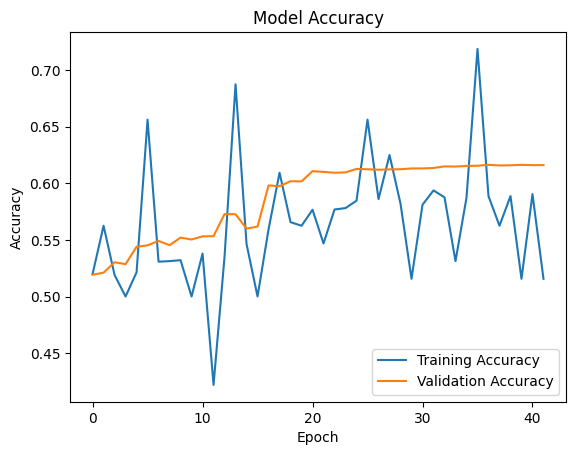

In [71]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


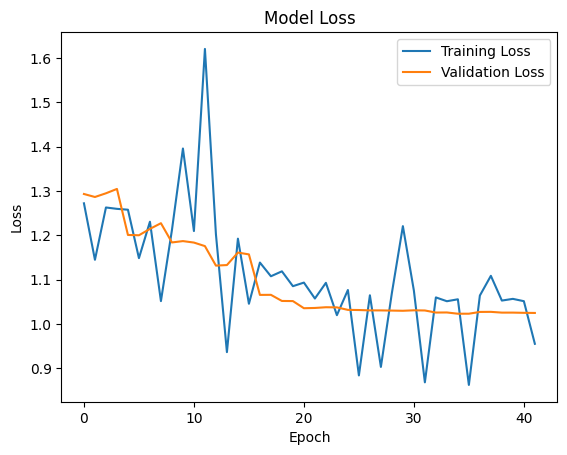

In [72]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


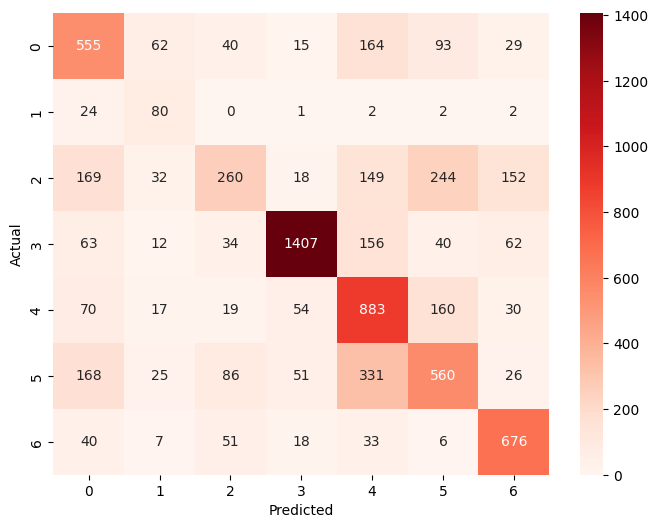

In [73]:
y_pred = model.predict(valid_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(valid_gen.classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(valid_gen.classes, y_pred_classes, target_names=list(valid_gen.class_indices.keys())))

              precision    recall  f1-score   support

       angry       0.51      0.58      0.54       958
     disgust       0.34      0.72      0.46       111
        fear       0.53      0.25      0.34      1024
       happy       0.90      0.79      0.84      1774
     neutral       0.51      0.72      0.60      1233
         sad       0.51      0.45      0.48      1247
    surprise       0.69      0.81      0.75       831

    accuracy                           0.62      7178
   macro avg       0.57      0.62      0.57      7178
weighted avg       0.63      0.62      0.61      7178

